# Import Packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import seaborn as sns
import missingno as mno

from sklearn.feature_extraction.text import TfidfVectorizer

# Import Dataset

In [2]:
# Dataset perlu diperbarui
franchise = pd.read_csv('https://drive.google.com/uc?export=download&id=1Vl0KXqTxcygmlnM5ZDqy8olOWhenCQ_R', low_memory=False)
franchise.info()
franchise.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   franchise_href             996 non-null    object 
 1   franchise_name             997 non-null    object 
 2   description                997 non-null    object 
 3   franchise_category         998 non-null    object 
 4   franchise_type             997 non-null    object 
 5   costs                      927 non-null    float64
 6   phone_number               437 non-null    object 
 7   email_address              254 non-null    object 
 8   year_established           566 non-null    float64
 9   company_name               556 non-null    object 
 10  company_address            263 non-null    object 
 11  country                    245 non-null    object 
 12  currency                   174 non-null    object 
 13  license_duration_in_years  276 non-null    float

,franchise_href,franchise_name,description,franchise_category,franchise_type,costs,phone_number,email_address,year_established,company_name,company_address,country,currency,license_duration_in_years,net_profits_per_month,return_of_investments,royalty_fees_per_month
0,https://fleibisnis.com/franchisedetails/akilad...,Akila Dental,AKILA DENTAL adalah klinik gigi pilihan terbai...,Health & Beauty,Waralaba,9.000000e+08,NaN,NaN,2015.0,"Akila Dental Indonesia, PT",Emporium Pluit Mall Lt2#01 Jl. Pluit Selatan R...,Indonesia,IDR,5.0,27000000.0,30,7
1,https://fleibisnis.com/franchisedetails/alfama...,"ALFAMART, ALFAEXPRESS dan ALFAX","PT Sumber Alfaria Trijaya, Tbk merupakan salah...",Retail & Minimarket,Waralaba,5.000000e+08,NaN,NaN,1999.0,"Sumber Alfaria Trijaya, Tbk","Alfa Tower Lantai 12, Jalan Jalur Sutera Barat...",Indonesia,IDR,5.0,NaN,NaN,NaN
2,https://fleibisnis.com/franchisedetails/amorca...,Amorcakes & Bakery,Amorcakes & Bakery adalah perusahaan yang berg...,Food & Beverage,Kemitraan,7.430000e+08,NaN,NaN,2010.0,"Inovasi Sukses Persada, PT","Jl. Ahmad Yani RT 003/005, Sukabumi, Jawa Bara...",Indonesia,NaN,5.0,NaN,NaN,1
3,https://fleibisnis.com/franchisedetails/anakba...,Anak Bakmie,Anak Bakmie by Jenda McLover terinspirasi atas...,Food & Beverage,Waralaba,8.000000e+07,NaN,NaN,2021.0,"Solomon Utama, PT","Jl. Kaji No.40, RT.10/RW.7, Petojo Utara, Keca...",Indonesia,IDR,5.0,20000000.0,20,NaN
4,https://fleibisnis.com/franchisedetails/apotekk24,Apotek K24,Apotek K24 merupakan Jaringan Apotek Waralaba ...,Health & Beauty,Waralaba,1.100000e+09,NaN,NaN,2002.0,"K24 Indonesia, PT","Jl. Magelang, Karangwaru Kidul Pr 24, Yogyakar...",Indonesia,IDR,6.0,NaN,NaN,2


In [3]:
franchise.duplicated().sum()

5

In [4]:
# Describe the features
feature = ['franchise_name', 'description', 'franchise_category', 'franchise_type', 'costs']

franchise[feature].describe()

,costs
count,9.270000e+02
mean,2.047215e+08
std,1.275014e+09
min,3.000000e+04
25%,1.000000e+07
50%,4.000000e+07
75%,1.290000e+08
max,3.000000e+10


# Exploratory Data Analysis

In [5]:
counts_franchise_name = franchise['franchise_name'].value_counts()
count_percentage = franchise['franchise_name'].value_counts(1)*100
counts_dffranchise_name = pd.DataFrame({'Franchise':counts_franchise_name.index,'Counts':counts_franchise_name.values,'Percent%':np.round(count_percentage.values,2)})
top_10_franchise_name = counts_dffranchise_name.head(10)
top_10_franchise_name

,Franchise,Counts,Percent%
0,Ameno Ramen,3,0.3
1,Burger Bangor,3,0.3
2,The Daily Wash Laundromat,2,0.2
3,Tahu Go!,2,0.2
4,Kopi Yor,2,0.2
5,Tentang Kopi,2,0.2
6,Ini Kopi Ulon,2,0.2
7,AutoClean Waterless,2,0.2
8,Suga Food Fried Chicken,2,0.2
9,Taman Sari Royal Heritage Spa,2,0.2


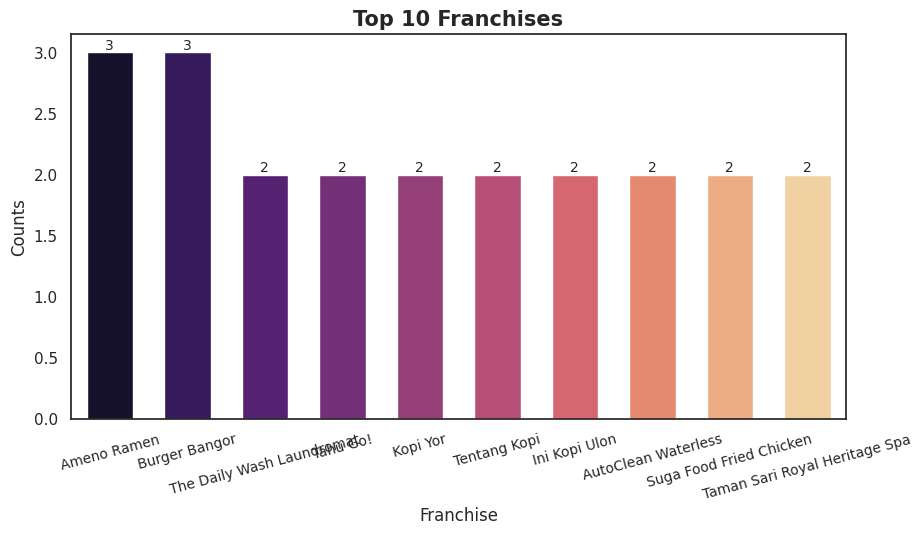

In [6]:
plt.figure(figsize=(10, 5))
sns.set(style='white')
ax = sns.barplot(x='Franchise', y='Counts', width = 0.6, data=top_10_franchise_name, palette='magma')
ax.set_title('Top 10 Franchises', fontsize=15, fontweight='bold')
ax.set_xlabel('Franchise', fontsize=12, fontweight='medium')
ax.set_ylabel('Counts', fontsize=12, fontweight='medium')

for label in ax.containers:
    ax.bar_label(label, fontweight='medium', fontsize=10)
plt.xticks(rotation = 15, fontsize=10)
plt.show()

In [7]:
pd_type = pd.DataFrame()
pd_type["Count"] = franchise["franchise_category"].value_counts()
pd_type["Count%"] = franchise["franchise_category"].value_counts()/franchise.shape[0]*100
pd_type

,Count,Count%
Food & Beverage,796,79.282869
Health & Beauty,60,5.976096
Cleaning Services,33,3.286853
Education,21,2.091633
Automotive,21,2.091633
Hobby & Entertainment,13,1.294821
Logistics,11,1.095618
Fashion,9,0.896414
Tour & Travel,8,0.796813
Technology,7,0.697211


In [8]:
fig = px.pie(pd_type, values = 'Count', color = pd_type.index, names = pd_type.index,
             color_discrete_sequence = ['#003049','#D62828', '#F77F00', '#FCBF49', '#E9D8A6'], hole = 0.5)
fig.update_traces(textposition = 'outside', textfont = dict(color = 'dark blue', size = 15), textinfo = 'label+percent', pull = [0.2,0,0,0], rotation = 10)
fig.add_annotation (text = 'Franchise Category', showarrow = False, font = dict(size = 12, color='dark blue'))
fig.update_layout(title={'text':'Franchise Category', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [9]:
counts = franchise['franchise_type'].value_counts()
count_percentage = franchise['franchise_type'].value_counts(1)*100
counts_df = pd.DataFrame({'Franchise Type':counts.index,'Counts':counts.values,'Percent%':np.round(count_percentage.values,2)})
counts_df

,Franchise Type,Counts,Percent%
0,Waralaba,807,80.94
1,Kemitraan,173,17.35
2,Peluang bisnis,13,1.30
3,Peluang Usaha,3,0.30
4,Keagenan,1,0.10


In [10]:
top_7 = counts_df.head(7)
sns.set(style='white')
fig = px.bar(data_frame=top_7, x='Franchise Type', y='Counts',
       color='Counts', color_continuous_scale='Inferno_r',
       width=800, height=600,
       text_auto=True, title=f'Count of Franchise Type')
fig.update_layout(plot_bgcolor='#FFFCF2', xaxis_tickangle = 15)
fig.show()

In [11]:
franchise['description']=franchise['description'].astype('category')
franchise['labels']=franchise['description'].cat.codes
franchise.head()

,franchise_href,franchise_name,description,franchise_category,franchise_type,costs,phone_number,email_address,year_established,company_name,company_address,country,currency,license_duration_in_years,net_profits_per_month,return_of_investments,royalty_fees_per_month,labels
0,https://fleibisnis.com/franchisedetails/akilad...,Akila Dental,AKILA DENTAL adalah klinik gigi pilihan terbai...,Health & Beauty,Waralaba,9.000000e+08,NaN,NaN,2015.0,"Akila Dental Indonesia, PT",Emporium Pluit Mall Lt2#01 Jl. Pluit Selatan R...,Indonesia,IDR,5.0,27000000.0,30,7,3
1,https://fleibisnis.com/franchisedetails/alfama...,"ALFAMART, ALFAEXPRESS dan ALFAX","PT Sumber Alfaria Trijaya, Tbk merupakan salah...",Retail & Minimarket,Waralaba,5.000000e+08,NaN,NaN,1999.0,"Sumber Alfaria Trijaya, Tbk","Alfa Tower Lantai 12, Jalan Jalur Sutera Barat...",Indonesia,IDR,5.0,NaN,NaN,NaN,567
2,https://fleibisnis.com/franchisedetails/amorca...,Amorcakes & Bakery,Amorcakes & Bakery adalah perusahaan yang berg...,Food & Beverage,Kemitraan,7.430000e+08,NaN,NaN,2010.0,"Inovasi Sukses Persada, PT","Jl. Ahmad Yani RT 003/005, Sukabumi, Jawa Bara...",Indonesia,NaN,5.0,NaN,NaN,1,21
3,https://fleibisnis.com/franchisedetails/anakba...,Anak Bakmie,Anak Bakmie by Jenda McLover terinspirasi atas...,Food & Beverage,Waralaba,8.000000e+07,NaN,NaN,2021.0,"Solomon Utama, PT","Jl. Kaji No.40, RT.10/RW.7, Petojo Utara, Keca...",Indonesia,IDR,5.0,20000000.0,20,NaN,22
4,https://fleibisnis.com/franchisedetails/apotekk24,Apotek K24,Apotek K24 merupakan Jaringan Apotek Waralaba ...,Health & Beauty,Waralaba,1.100000e+09,NaN,NaN,2002.0,"K24 Indonesia, PT","Jl. Magelang, Karangwaru Kidul Pr 24, Yogyakar...",Indonesia,IDR,6.0,NaN,NaN,2,28


In [12]:
counts_effect = franchise['description'].value_counts()
count_percentage = franchise['description'].value_counts(1)*100
counts_effect_df = pd.DataFrame({'Description':counts_effect.index,'Counts':counts_effect.values,'Percent%':np.round(count_percentage.values,2)})
counts_effect_df.head(10)

,Description,Counts,Percent%
0,Tempat makan yang menawarkan hidangan shabu-sh...,2,0.2
1,Layanan perawatan dan kesehatan dengan fokus p...,2,0.2
2,Toko kue atau kafe yang menawarkan berbagai je...,2,0.2
3,Tangis Kentang Sosis dan Mozarella adalah jaja...,2,0.2
4,Warung makan yang menawarkan hidangan soto kha...,2,0.2
5,"Sejak 2020, Ete Juice Bar hadir untuk memenuhi...",2,0.2
6,Warung makan yang menawarkan tahu dengan berba...,2,0.2
7,Restoran atau gerai yang menawarkan berbagai j...,2,0.2
8,Warung makan yang menawarkan berbagai hidangan...,2,0.2
9,Softcase Laptop Icainu menawarkan berbagai pro...,1,0.1


In [13]:
top_5 = counts_effect_df.head(5)
fig = px.pie(top_5, values = 'Counts', color = 'Description', names = 'Description',
             color_discrete_sequence = ['#99582A','#F4ACB7', '#FFCCD5', '#FDFCDC', '#C6AC8F'])
fig.update_traces(textposition = 'inside', textfont = dict(color = 'black', size = 15), textinfo = 'percent')
fig.update_layout(title={'text':'Franchise Description', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

# Data Cleaning

In [14]:
# Remove duplicated rows (14 in total)
franchise.drop_duplicates(inplace=True)

# Re-checking the existence of duplicated rows
franchise.duplicated().sum()

0

# Data Preparation

TF-IDF Vectorization

In [15]:
# Fill NaN values with an empty string before splitting
franchise['franchise_category'].fillna('', inplace=True)

# Separate all skintype into one list, considering comma + space as separators
franchise_category = franchise['franchise_category'].str.split(', ').tolist()

# Flatten the list
flat_franchise_category = [item for sublist in franchise_category for item in sublist]

# Convert to a set to make unique
set_franchise_category = set(flat_franchise_category)

# Back to list
unique_franchise_category = list(set_franchise_category)

# Create columns by each unique skintype
franchise = franchise.reindex(franchise.columns.tolist() + unique_franchise_category, axis=1, fill_value=0)

# For each value inside column, update the dummy
for index, row in franchise.iterrows():
    for val in row.franchise_category.split(', '):
        if val != 'NA' and val in unique_franchise_category:
            franchise.loc[index, val] = 1

In [16]:
franchise.head(5)

,franchise_href,franchise_name,description,franchise_category,franchise_type,costs,phone_number,email_address,year_established,company_name,...,Jasa Logistics,Finance,Retail & Minimarket,Automotive,Teknologi,Fashion,19,Education,Technology,Advertising
0,https://fleibisnis.com/franchisedetails/akilad...,Akila Dental,AKILA DENTAL adalah klinik gigi pilihan terbai...,Health & Beauty,Waralaba,9.000000e+08,NaN,NaN,2015.0,"Akila Dental Indonesia, PT",...,0,0,0,0,0,0,0,0,0,0
1,https://fleibisnis.com/franchisedetails/alfama...,"ALFAMART, ALFAEXPRESS dan ALFAX","PT Sumber Alfaria Trijaya, Tbk merupakan salah...",Retail & Minimarket,Waralaba,5.000000e+08,NaN,NaN,1999.0,"Sumber Alfaria Trijaya, Tbk",...,0,0,1,0,0,0,0,0,0,0
2,https://fleibisnis.com/franchisedetails/amorca...,Amorcakes & Bakery,Amorcakes & Bakery adalah perusahaan yang berg...,Food & Beverage,Kemitraan,7.430000e+08,NaN,NaN,2010.0,"Inovasi Sukses Persada, PT",...,0,0,0,0,0,0,0,0,0,0
3,https://fleibisnis.com/franchisedetails/anakba...,Anak Bakmie,Anak Bakmie by Jenda McLover terinspirasi atas...,Food & Beverage,Waralaba,8.000000e+07,NaN,NaN,2021.0,"Solomon Utama, PT",...,0,0,0,0,0,0,0,0,0,0
4,https://fleibisnis.com/franchisedetails/apotekk24,Apotek K24,Apotek K24 merupakan Jaringan Apotek Waralaba ...,Health & Beauty,Waralaba,1.100000e+09,NaN,NaN,2002.0,"K24 Indonesia, PT",...,0,0,0,0,0,0,0,0,0,0


# Export the Dataframe to CSV File

In [17]:
franchise.to_csv("export_walbiz.csv")

# Modelling

In [18]:
# Modeling with Content Based Filtering
# Initializing TfidfVectorizer
tf = TfidfVectorizer()

# Perform IDF calculation on 'notable_efects' data
tf.fit(franchise['franchise_category'])

# Mapping array from integer index feature to name feature
tf.get_feature_names_out()

array(['19', 'advertising', 'automotive', 'beauty', 'beverage',
       'cleaninf', 'cleaning', 'education', 'entertainment', 'fashion',
       'finance', 'food', 'health', 'healthy', 'hobby', 'jasa',
       'logistics', 'minimarket', 'retail', 'servces', 'services', 'shop',
       'technology', 'teknologi', 'tour', 'transportation', 'travel'],
      dtype=object)

In [19]:
# Doing fit then transformed to matrix form
tfidf_matrix = tf.fit_transform(franchise['franchise_category'])

# Viewing matrix size TF IDF
shape = tfidf_matrix.shape
shape

(999, 27)

In [20]:
# Convert TF-IDF vector in matrix form with todense() function
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [21]:
# Making dataframe to see TF-IDF matrix

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=franchise.franchise_name
).sample(shape[1], axis=1).sample(10, axis=0)

,education,automotive,cleaninf,cleaning,finance,travel,beverage,healthy,services,minimarket,...,entertainment,fashion,servces,health,jasa,hobby,transportation,19,shop,food
franchise_name,,,,,,,,,,,,,,,,,,,,,
Daily Fresh Water Depot Air Minum,0.0,0.0,0.0,0.000000,0.0,0.000000,0.707107,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
Jiwa Toast,0.0,0.0,0.0,0.000000,0.0,0.000000,0.707107,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
Apple Laundry Center,0.0,0.0,0.0,0.707107,0.0,0.000000,0.000000,0.0,0.707107,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Beanstock Coffee and Tea,0.0,0.0,0.0,0.000000,0.0,0.000000,0.707107,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
Ayam & Bebek Goreng Sambal Bledek Cak tri,0.0,0.0,0.0,0.000000,0.0,0.000000,0.707107,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
Meatlovers,0.0,0.0,0.0,0.000000,0.0,0.000000,0.707107,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
Premium Backer Coffee & Buns,0.0,0.0,0.0,0.000000,0.0,0.000000,0.707107,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
TOS ( Travelku Online System ),0.0,0.0,0.0,0.000000,0.0,0.707107,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Teh Cap Poci,0.0,0.0,0.0,0.000000,0.0,0.000000,0.707107,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107


# Cosine Similarity

In [22]:
# Calculating Cosine Similarity on the TF-IDF matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=franchise['franchise_name'], columns=franchise['franchise_name'])

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

franchise_name,Kedai Kopi Kulo,Baksotopia,Wowteg,Kopte,The Bizztro
franchise_name,,,,,
BAKWAN DAY!,1.0,1.0,1.0,1.0,1.0
Woo Ai Mie Bakmi,1.0,1.0,1.0,1.0,1.0
SR12,0.0,0.0,0.0,0.0,0.0
Kopi Titik Koma,1.0,1.0,1.0,1.0,1.0
Sultan Pisang Goreng,1.0,1.0,1.0,1.0,1.0
Kapal Api Coffee Corner,1.0,1.0,1.0,1.0,1.0
Ayam Geprek Kampus,1.0,1.0,1.0,1.0,1.0
SLANKAFE,1.0,1.0,1.0,1.0,1.0
AGEWO Ayam Gepruk Wonogiri,1.0,1.0,1.0,1.0,1.0


# Getting Recommendation

In [24]:
def franchise_recommendations(nama, similarity_data=cosine_sim_df, items=franchise[['franchise_name', 'franchise_category','franchise_type', 'costs']], k=5):

    # Retrieve data by using argpartition to partition indirectly along a given axis
    # Dataframe converted to be numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama].to_numpy().argpartition(
        range(-1, -k, -1))

    # Retrieve data with the greatest similarity from the existing index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop a name so that the name of the product we are looking for doesnt' appear in the list of recommendations
    closest = closest.drop(nama, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [25]:
franchise[franchise.franchise_name.eq('Bakso Kemon')].head()

,franchise_href,franchise_name,description,franchise_category,franchise_type,costs,phone_number,email_address,year_established,company_name,...,Jasa Logistics,Finance,Retail & Minimarket,Automotive,Teknologi,Fashion,19,Education,Technology,Advertising
685,https://klikfranchisecom/services/franchisedan...,Bakso Kemon,Bakso Kemon adalah peluang bisnis makanan yang...,Food & Beverage,Waralaba,550000000.0,NaN,NaN,2017.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [26]:
franchise_recommendations("Bakso Kemon")

,franchise_name,franchise_category,franchise_type,costs
0,Starkult,Food & Beverage,Waralaba,9900000.0
1,Tahu Baso Wow,Food & Beverage,Waralaba,8000000.0
2,Pick Cup,Food & Beverage,Kemitraan,198000000.0
3,Picknick Yuk Nona Manis,Food & Beverage,Kemitraan,150000000.0
4,Warung Sangrai,Food & Beverage,Waralaba,NaN


In [27]:
import h5py

# Simpan matriks similarity ke dalam file h5
with h5py.File('cosine_similarity.h5', 'w') as hf:
    hf.create_dataset("cosine_similarity_matrix",  data=cosine_sim)

In [28]:
!ls

cosine_similarity.h5  export_walbiz.csv  sample_data


In [29]:
from google.colab import files
files.download("cosine_similarity.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import h5py
model_file = h5py.File("cosine_similarity.h5", 'r')
print("Keys in model file:", list(model_file.keys()))

Keys in model file: ['cosine_similarity_matrix']
